# Ensemble Learning with Traditional ML Models

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import f1_score
import optuna

In [4]:
X_train = np.load("data/Regular_processed/Without_Ordinal_Encoding/X_train.npy")
X_valid = np.load("data/Regular_processed/Without_Ordinal_Encoding/X_valid.npy")
y_train = np.load("data/Regular_processed/Without_Ordinal_Encoding/y_train.npy")
y_valid = np.load("data/Regular_processed/Without_Ordinal_Encoding/y_valid.npy")
X_test = np.load("data/Regular_Processed/Without_Ordinal_Encoding/X_test.npy")

for arr in [X_train, X_valid, y_train, y_valid, X_test]:
    print(arr.shape)

(988, 66)
(247, 66)
(988,)
(247,)
(824, 66)


# Loading Traditional ML Models

### Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(max_depth=23, random_state=123, criterion='entropy', n_estimators=28)
random_forest_classifier.fit(X_train, y_train)
train_preds = random_forest_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = random_forest_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 1.0
Valid F1 Score: 0.728744939271255


In [6]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(max_depth=5, random_state=123, criterion='gini', n_estimators=23)
random_forest_classifier.fit(X_train, y_train)
train_preds = random_forest_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = random_forest_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.7601214574898785
Valid F1 Score: 0.7125506072874493


In [7]:
def objective(trial):
    # Suggest values for the hyperparameters using a trial object.
    rf_criterion = trial.suggest_categorical('rf_criterion', ['gini', 'entropy', 'log_loss'])
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 7, log=True)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 2, 50, log=True)
    classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_n_estimators, random_state=123, criterion=rf_criterion)
    classifier_obj.fit(X_train, y_train)
    train_preds = classifier_obj.predict(X_train)
    train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
    valid_preds_optuna = classifier_obj.predict(X_valid)
    valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds_optuna, average='micro')
    
    return valid_f1_score  # - abs((train_f1_score - valid_f1_score)/7)

# Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-04-18 15:33:20,747] A new study created in memory with name: no-name-f74e4603-bb7f-4b73-9ab7-b3f3d32624c4
[I 2024-04-18 15:33:20,761] Trial 0 finished with value: 0.6396761133603239 and parameters: {'rf_criterion': 'log_loss', 'rf_max_depth': 7, 'rf_n_estimators': 5}. Best is trial 0 with value: 0.6396761133603239.
[I 2024-04-18 15:33:20,772] Trial 1 finished with value: 0.6477732793522267 and parameters: {'rf_criterion': 'gini', 'rf_max_depth': 2, 'rf_n_estimators': 9}. Best is trial 1 with value: 0.6477732793522267.
[I 2024-04-18 15:33:20,795] Trial 2 finished with value: 0.6680161943319838 and parameters: {'rf_criterion': 'entropy', 'rf_max_depth': 2, 'rf_n_estimators': 26}. Best is trial 2 with value: 0.6680161943319838.
[I 2024-04-18 15:33:20,805] Trial 3 finished with value: 0.6639676113360324 and parameters: {'rf_criterion': 'gini', 'rf_max_depth': 3, 'rf_n_estimators': 9}. Best is trial 2 with value: 0.6680161943319838.
[I 2024-04-18 15:33:20,838] Trial 4 finished with 

In [8]:
print(f"Best Trial\nValid Micro Averaged F1 Score: {study.best_trial.values}\nHyperParameters = {study.best_trial.params}")

Best Trial
Valid Micro Averaged F1 Score: [0.708502024291498]
HyperParameters = {'rf_criterion': 'gini', 'rf_max_depth': 6, 'rf_n_estimators': 20}


### Bernoulli Naive Bayes

In [13]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes_classifier = BernoulliNB()
naive_bayes_classifier.fit(X_train, y_train)
train_preds = naive_bayes_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = naive_bayes_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.6973684210526315
Valid F1 Score: 0.6680161943319838


### Nearest Centroid

In [9]:
from sklearn.neighbors import NearestCentroid

nearest_centroid_classifier = NearestCentroid(metric='correlation')
nearest_centroid_classifier.fit(X_train, y_train)
train_preds = nearest_centroid_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = nearest_centroid_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.6589068825910931
Valid F1 Score: 0.6720647773279352


/Users/sephchen/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/sephchen/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


In [10]:
def objective(trial):
    # Suggest values for the hyperparameters using a trial object.
    rf_metric = trial.suggest_categorical('rf_metric', ['hamming', 'cosine', 'euclidean', 'yule', 'russellrao', 'jaccard', 'chebyshev',
                                                        'sokalmichener', 'sqeuclidean', 'matching', 'rogerstanimoto', 'nan_euclidean',
                                                        'dice', 'sokalsneath', 'correlation', 'canberra', 'manhattan', 'braycurtis'])
    classifier_obj = NearestCentroid(metric=rf_metric)
    classifier_obj.fit(X_train, y_train)
    train_preds = classifier_obj.predict(X_train)
    train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
    valid_preds_optuna = classifier_obj.predict(X_valid)
    valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds_optuna, average='micro')
    
    return valid_f1_score

# Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-04-18 15:33:31,215] A new study created in memory with name: no-name-a344cc50-93cb-45a0-9e33-3dc28f734fe0
/Users/sephchen/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/sephchen/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/Users/sephchen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)
/Users/sephchen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolea

In [11]:
print(f"Best Trial\nValid Micro Averaged F1 Score: {study.best_trial.values}\nHyperParameters = {study.best_trial.params}")

Best Trial
Valid Micro Averaged F1 Score: [0.6720647773279352]
HyperParameters = {'rf_metric': 'correlation'}


# Ensemble Learning

In [14]:
estimator_dict = {
    'random_forest': random_forest_classifier,
    'nearest_centroid': nearest_centroid_classifier,
    'bernoulli_naive_bayes': naive_bayes_classifier
}
estimators = list(estimator_dict.items())

### Analysis of Models

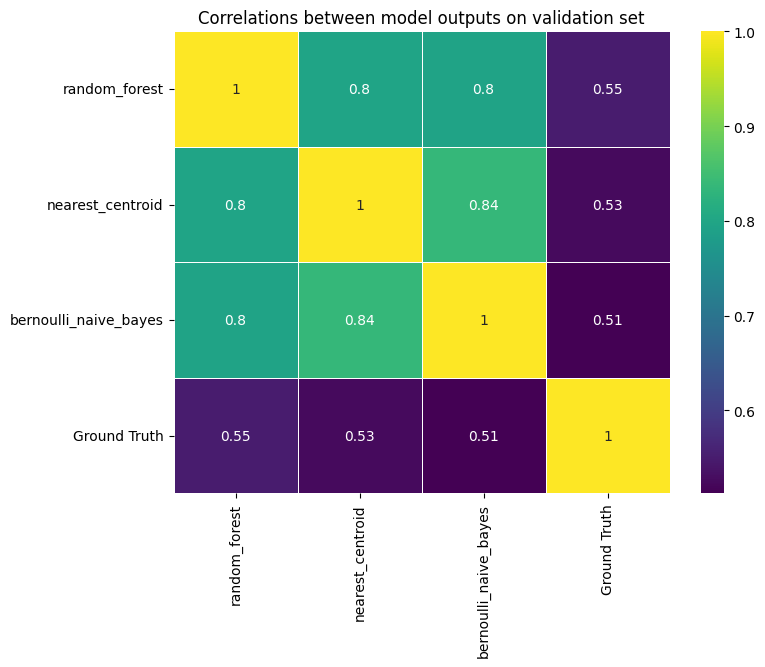

In [15]:
val_preds_df = pd.DataFrame()
for name, model in estimators:
    val_preds_df[name] = model.predict(X_valid)
val_preds_df['Ground Truth'] = y_valid

# Create the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(val_preds_df.corr(), cmap = 'viridis', annot=True, linewidths=.5)
plt.title("Correlations between model outputs on validation set")
plt.show()

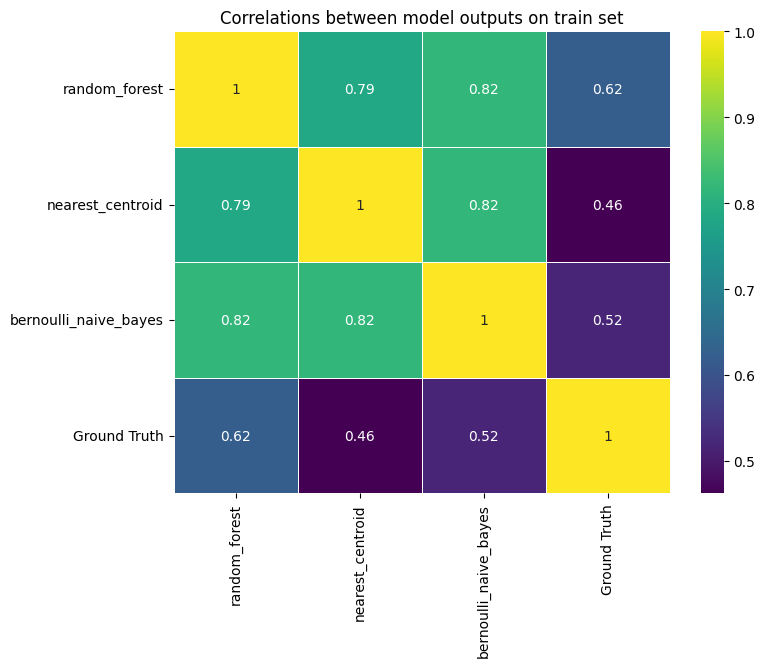

In [16]:
train_preds_df = pd.DataFrame()
for name, model in estimators:
    train_preds_df[name] = model.predict(X_train)
train_preds_df['Ground Truth'] = y_train

# Create the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(train_preds_df.corr(), cmap = 'viridis', annot=True, linewidths=.5)
plt.title("Correlations between model outputs on train set")
plt.show()

### Voting Classifier

In [17]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=estimators, voting='hard', weights=[3, 2, 1])
voting_classifier.fit(X_train, y_train)

train_preds = voting_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = voting_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')
print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.7317813765182185
Valid F1 Score: 0.7004048582995951


/Users/sephchen/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/sephchen/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


### Stacking Classifier

In [18]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())
clf.fit(X_train, y_train)

train_preds = voting_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = voting_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')
print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.7317813765182185
Valid F1 Score: 0.7004048582995951


/Users/sephchen/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/sephchen/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/Users/sephchen/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/sephchen/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. Th

### Custom Ensemble using Decision Tree & Some inputs columns

In [19]:
train_preds_df = pd.DataFrame()
for name, model in estimators:
    train_preds_df[name] = model.predict(X_train)

val_preds_df = pd.DataFrame()
for name, model in estimators:
    val_preds_df[name] = model.predict(X_valid)

test_preds_df = pd.DataFrame()
for name, model in estimators:
    test_preds_df[name] = model.predict(X_test)

train_df = pd.read_csv("data/Regular_Processed/Without_Ordinal_Encoding/train_processed.csv")
valid_df = pd.read_csv("data/Regular_Processed/Without_Ordinal_Encoding/valid_processed.csv")
test_df = pd.read_csv("data/Regular_Processed/Without_Ordinal_Encoding/test_processed.csv")

FEATURE_NAMES_TO_ADD = ['total_protein', 'nasogastric_reflux_ph', 'packed_cell_volume', 'abdomo_protein', 'respiratory_rate', 'pain_is_extreme_pain']
for feature in FEATURE_NAMES_TO_ADD:
    train_preds_df[feature] = train_df[feature]
    val_preds_df[feature] = valid_df[feature]
    test_preds_df[feature] = test_df[feature]

X_train_with_preds = train_preds_df.to_numpy()
X_valid_with_preds = val_preds_df.to_numpy()
X_test_with_preds = test_preds_df.to_numpy()

print(f"X_train_with_preds shape: {X_train_with_preds.shape}\nX_valid_with_preds shape: {X_valid_with_preds.shape}\nX_test_with_preds shape: {X_test_with_preds.shape}")

X_train_with_preds shape: (988, 9)
X_valid_with_preds shape: (247, 9)
X_test_with_preds shape: (824, 9)


# Final Estimator using Neural Network

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.dropout=nn.Dropout(p=0.2)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
        out = self.dropout(out)
        out = self.softmax(out)
        return out

# Hyperparameters
input_size = X_train_with_preds.shape[1]
hidden_size = 64  # Adjust based on your data and experimentation
num_classes = 3
num_epochs = 500  # Adjust based on your data and experimentation
batch_size = 32  # Adjust based on your data and experimentation
learning_rate = 0.001

# Initialize the model, loss function, and optimizer
model = NeuralNetwork(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Convert data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train_with_preds).float()
y_train_tensor = torch.from_numpy(y_train).long()
X_valid_tensor = torch.from_numpy(X_valid_with_preds).float()
y_valid_tensor = torch.from_numpy(y_valid).long()
X_test_tensor = torch.from_numpy(X_test_with_preds).float()

# Create data loaders
train_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor),
    batch_size=batch_size, shuffle=True
)
valid_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(X_valid_tensor, y_valid_tensor),
    batch_size=batch_size, shuffle=False
)

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    
    # Performance evaluation on training set
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        train_outputs = model(X_train_tensor)
        train_loss = criterion(train_outputs, y_train_tensor)
        _, train_predicted = torch.max(train_outputs, 1)
        train_f1 = f1_score(y_train_tensor, train_predicted, average='macro')
    
    # Performance evaluation on validation set
    with torch.no_grad():
        valid_outputs = model(X_valid_tensor)
        valid_loss = criterion(valid_outputs, y_valid_tensor)
        _, valid_predicted = torch.max(valid_outputs, 1)
        valid_f1 = f1_score(y_valid_tensor, valid_predicted, average='macro')
    
    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Training Loss: {train_loss.item():.4f}, Training F1 Score: {train_f1:.4f}, '
          f'Validation Loss: {valid_loss.item():.4f}, Validation F1 Score: {valid_f1:.4f}')

Epoch 1/500, Training Loss: 0.9702, Training F1 Score: 0.5508, Validation Loss: 0.9728, Validation F1 Score: 0.5495
Epoch 2/500, Training Loss: 0.9209, Training F1 Score: 0.6022, Validation Loss: 0.9255, Validation F1 Score: 0.6038
Epoch 3/500, Training Loss: 0.8920, Training F1 Score: 0.6655, Validation Loss: 0.9043, Validation F1 Score: 0.6617
Epoch 4/500, Training Loss: 0.8716, Training F1 Score: 0.6779, Validation Loss: 0.8897, Validation F1 Score: 0.6727
Epoch 5/500, Training Loss: 0.8590, Training F1 Score: 0.6913, Validation Loss: 0.8824, Validation F1 Score: 0.6839
Epoch 6/500, Training Loss: 0.8494, Training F1 Score: 0.6969, Validation Loss: 0.8759, Validation F1 Score: 0.6871
Epoch 7/500, Training Loss: 0.8419, Training F1 Score: 0.7048, Validation Loss: 0.8719, Validation F1 Score: 0.6946
Epoch 8/500, Training Loss: 0.8359, Training F1 Score: 0.7133, Validation Loss: 0.8696, Validation F1 Score: 0.6872
Epoch 9/500, Training Loss: 0.8317, Training F1 Score: 0.7172, Validatio

In [20]:
from sklearn.tree import DecisionTreeClassifier

final_classifier = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3, splitter='best')
final_classifier.fit(X_train_with_preds, y_train)

train_preds = final_classifier.predict(X_train_with_preds)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = final_classifier.predict(X_valid_with_preds)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.76417004048583
Valid F1 Score: 0.7125506072874493


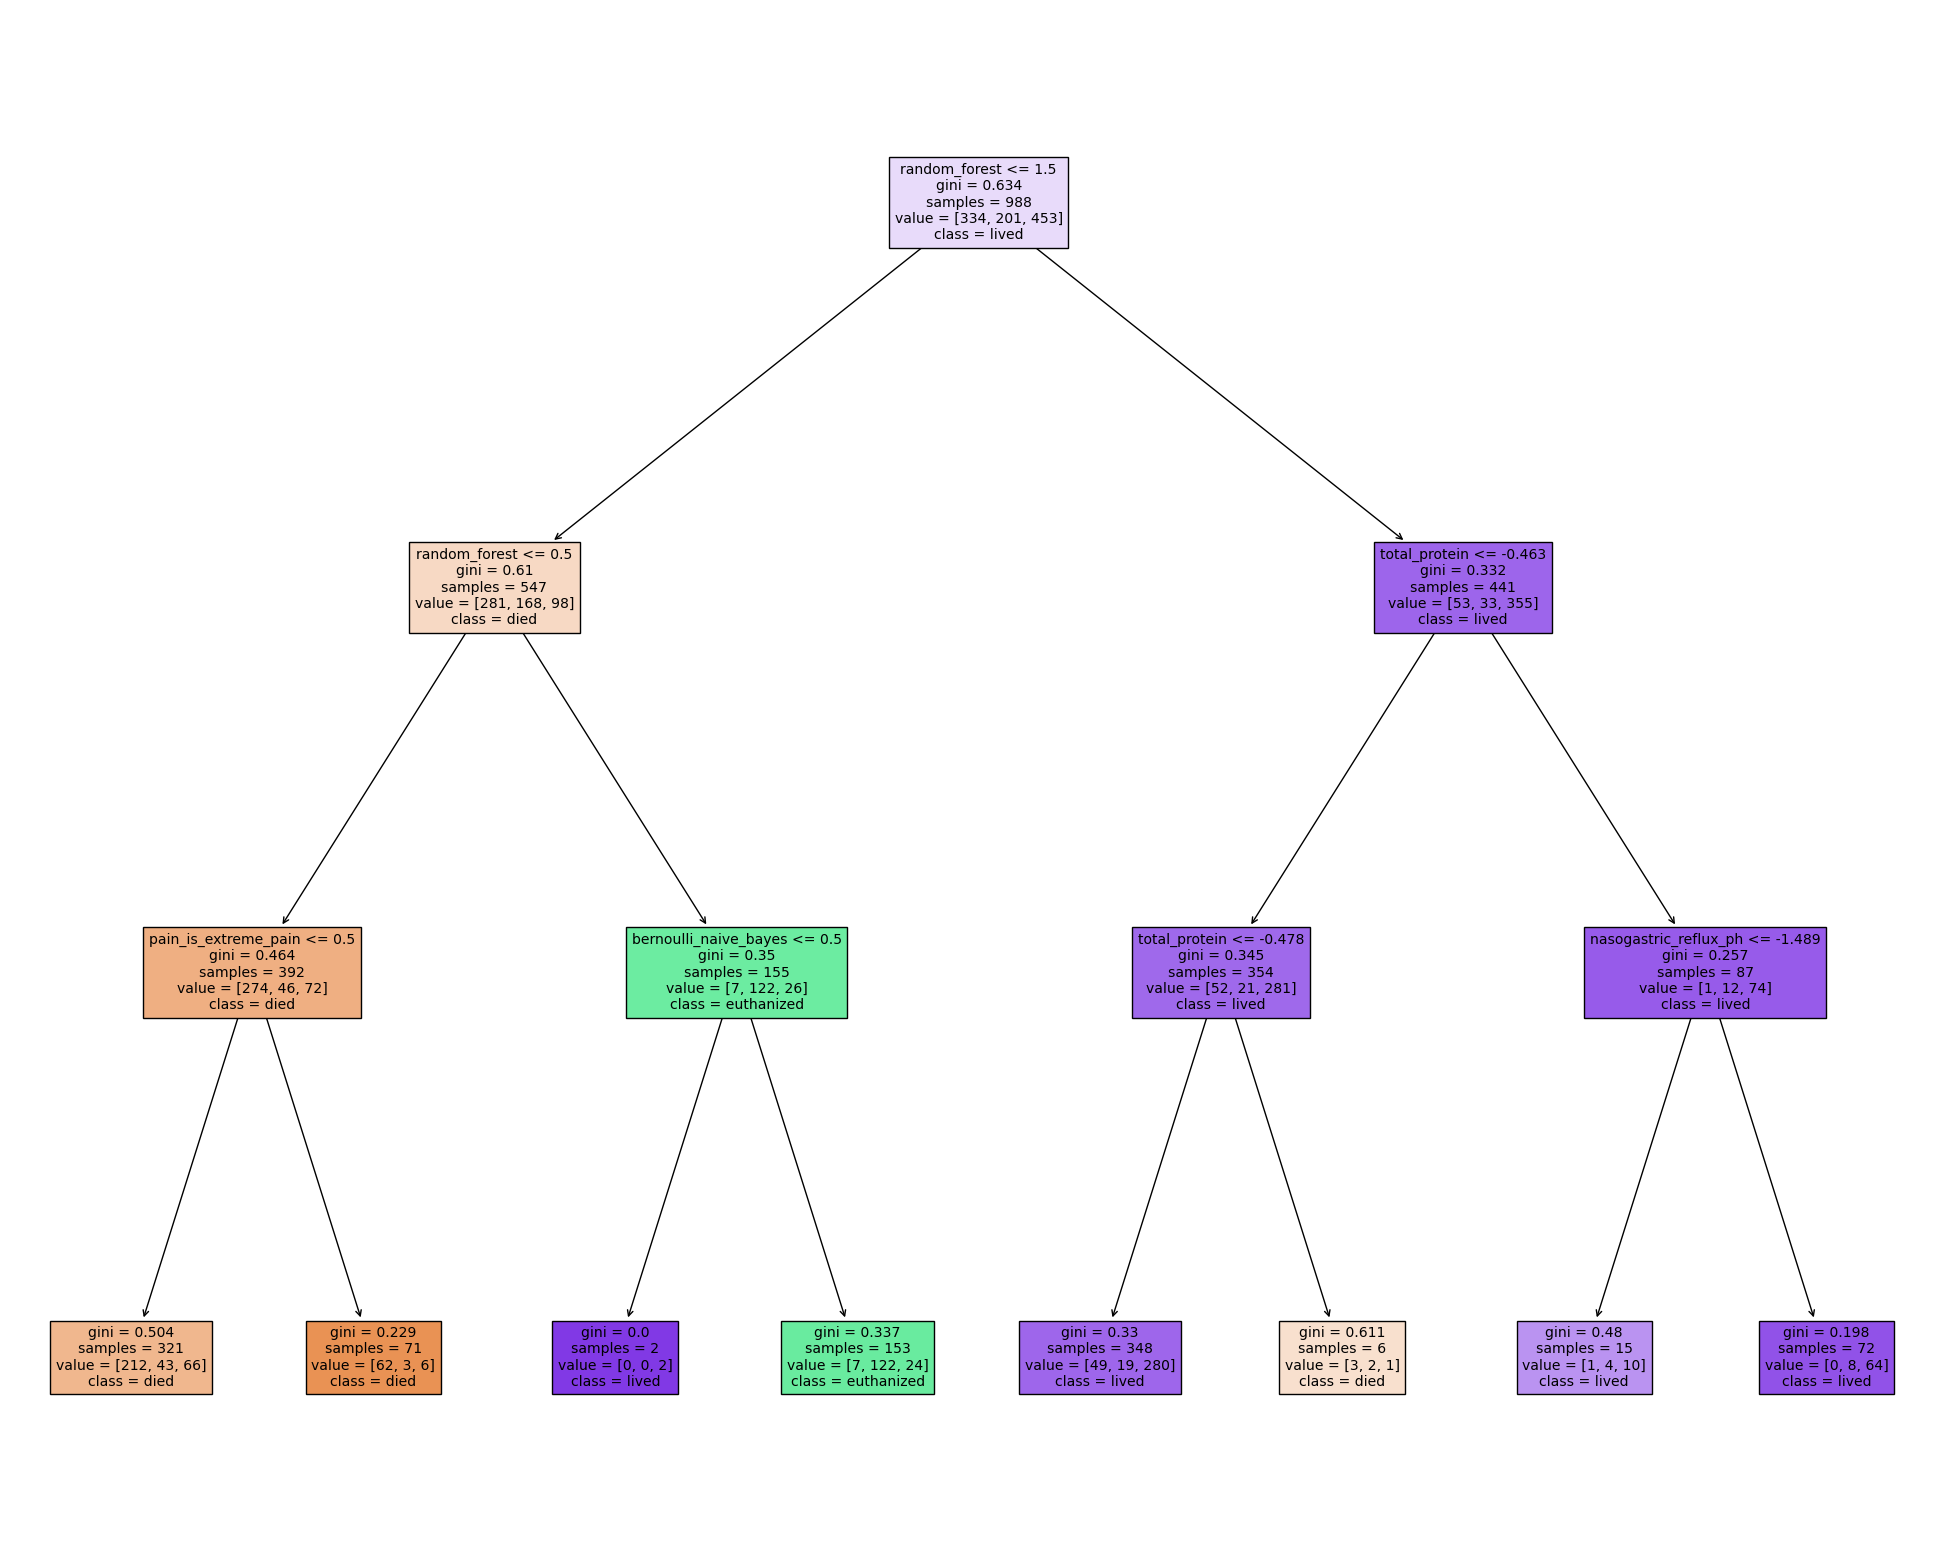

In [21]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(final_classifier, 
                   feature_names=list(train_preds_df.columns),  
                   class_names=['died', 'euthanized', 'lived'],
                   filled=True)

In [22]:
test_preds = final_classifier.predict(X_test_with_preds)

In [25]:
PRED_CATEGORIES = ['died', 'euthanized', 'lived']
pred_list = [PRED_CATEGORIES[el] for el in test_preds]

submission_df = pd.DataFrame()
df_test_raw = pd.read_csv("data/test.csv")
submission_df['id'] = df_test_raw['id']
submission_df['outcome'] = pred_list

In [28]:
submission_df.to_csv("submissions/Without_Ordinal_Encoding/DecisionTree_Ensemble_3_RandomForest_NearestCentroid_NaiveBayes_Submission.csv", index=False)